In [23]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

from plotter import *

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

In [24]:
year = '2017'
ddbthr = 0.64

In [25]:
with open('lumi.json') as f:
  lumi = json.load(f)

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagSFbc_'+year+'Up','btagSFbc_'+year+'Down','btagSFlight_'+year+'Up','btagSFlight_'+year+'Down',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
               'pileup_weightUp','pileup_weightDown',
               'muon_ID_'+year+'_valueDown','muon_ID_'+year+'_valueDown',
               'muon_ISO_'+year+'_valueDown','muon_ISO_'+year+'_valueDown',
               'muon_TRIGNOISO_'+year+'_valueDown','muon_TRIGNOISO_'+year+'_valueDown',
               'L1PrefiningUp','L1PrefiringDown',
              ]


In [26]:
ggf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-ggf').integrate('mjj',overflow='allnan')
vbf = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','signal-vbf').integrate('mjj',overflow='allnan')
mucr = pickle.load(open(str(year)+'/templates.pkl','rb')).integrate('region','muoncontrol').integrate('mjj',overflow='allnan')

In [27]:
ggf.identifiers('systematic')

[<StringBin (JERDown) instance at 0x7fbd0a262a60>,
 <StringBin (JERUp) instance at 0x7fbd0a04df10>,
 <StringBin (JESDown) instance at 0x7fbd0c005790>,
 <StringBin (JESUp) instance at 0x7fbd0c005b80>,
 <StringBin (L1PrefiringDown) instance at 0x7fbd15a7f9a0>,
 <StringBin (L1PrefiringUp) instance at 0x7fbd0af43340>,
 <StringBin (PDF_weightDown) instance at 0x7fbd0c289370>,
 <StringBin (PDF_weightUp) instance at 0x7fbd0a8381f0>,
 <StringBin (PDFaS_weightDown) instance at 0x7fbd0a5acd30>,
 <StringBin (PDFaS_weightUp) instance at 0x7fbd0af0a3d0>,
 <StringBin (UEPS_FSRDown) instance at 0x7fbd0af0a4f0>,
 <StringBin (UEPS_FSRUp) instance at 0x7fbd0be057c0>,
 <StringBin (UEPS_ISRDown) instance at 0x7fbd0a044a00>,
 <StringBin (UEPS_ISRUp) instance at 0x7fbd0a34cbb0>,
 <StringBin (UESDown) instance at 0x7fbd0c0058e0>,
 <StringBin (UESUp) instance at 0x7fbd0c0055e0>,
 <StringBin (W_d2kappa_EWDown) instance at 0x7fbd09acc250>,
 <StringBin (W_d2kappa_EWUp) instance at 0x7fbd09accc40>,
 <StringBin (W

In [28]:
ggf_pass = ggf.sum('pt1').integrate('ddb1',int_range=slice(ddbthr,1))
vbf_pass = vbf.sum('pt1').integrate('ddb1',int_range=slice(ddbthr,1))
mucr_pass = mucr.sum('pt1').integrate('ddb1',int_range=slice(ddbthr,1))

ggf_all = ggf.sum('ddb1','pt1')
vbf_all = vbf.sum('ddb1','pt1')
mucr_all = mucr.sum('ddb1','pt1')

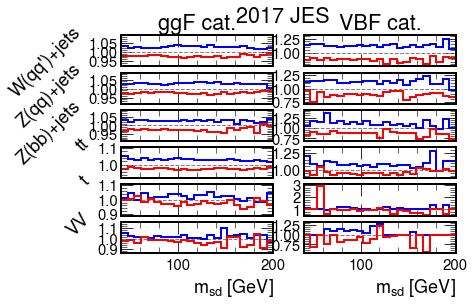

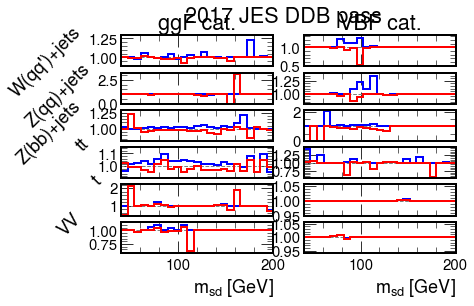

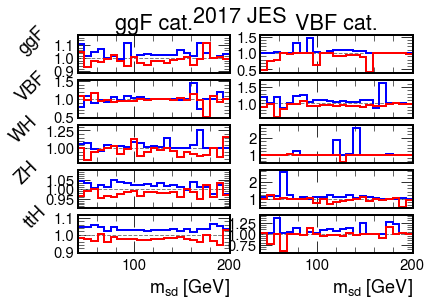

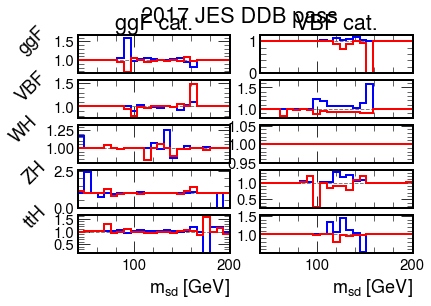

In [29]:
s = 'JES'
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

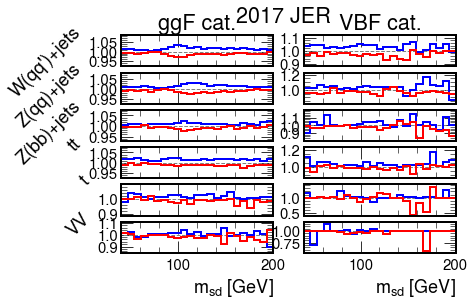

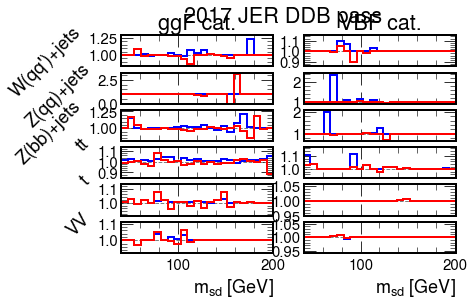

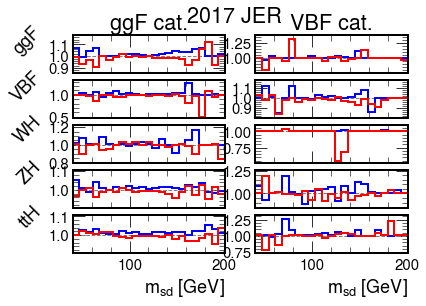

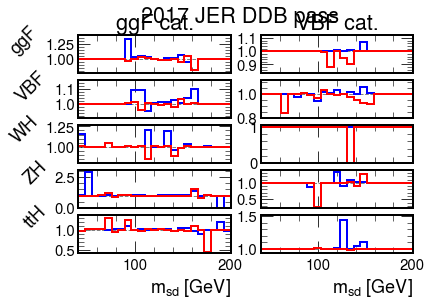

In [30]:
s = 'JER'
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

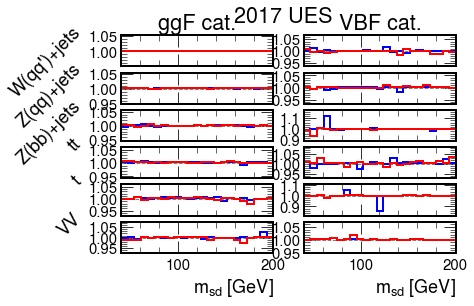

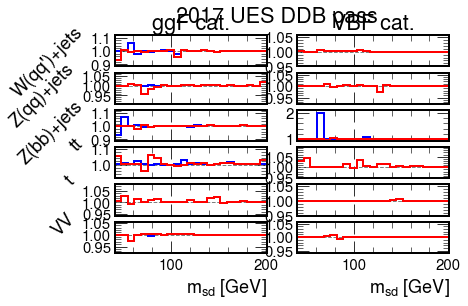

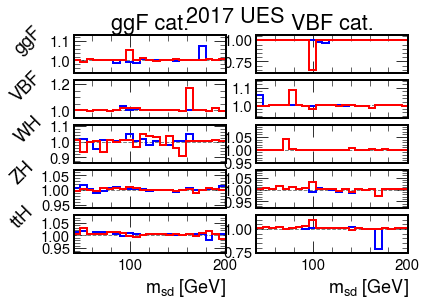

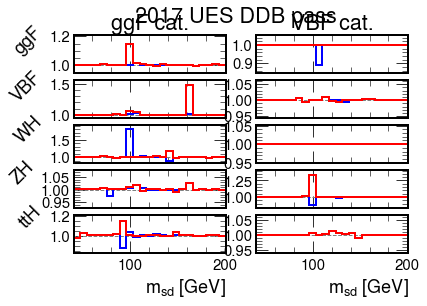

In [31]:
s = 'UES'
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

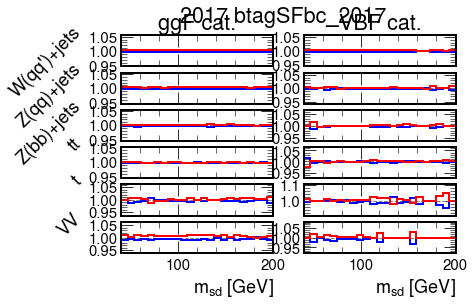

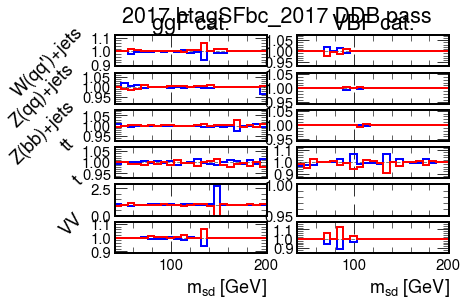

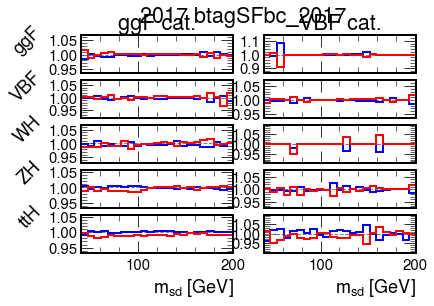

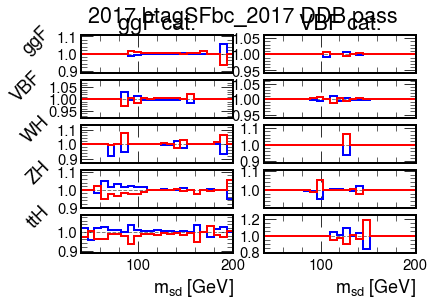

In [32]:
s = 'btagSFbc_'+year
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

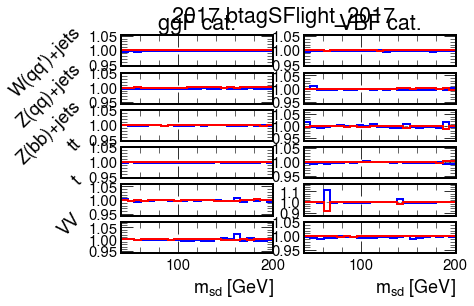

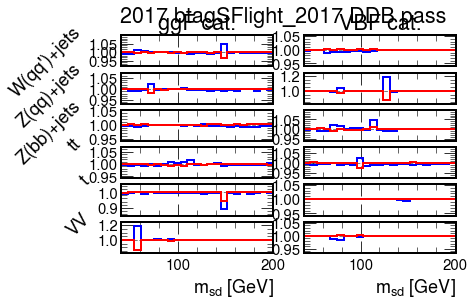

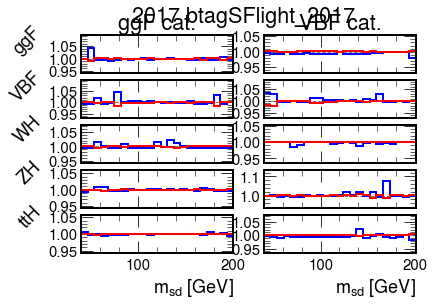

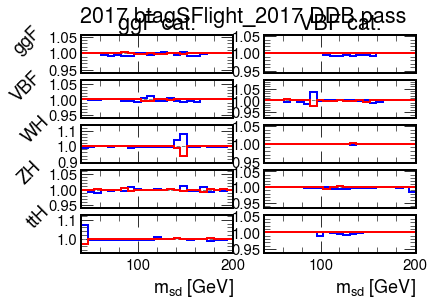

In [33]:
s = 'btagSFlight_'+year
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

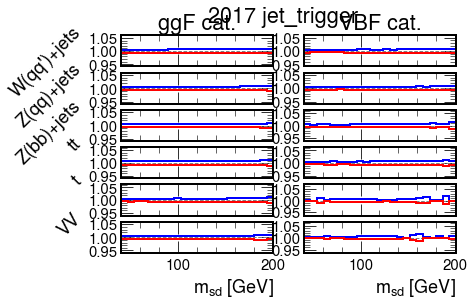

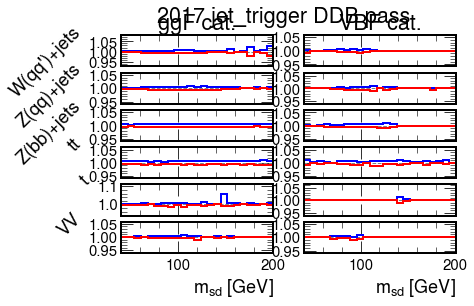

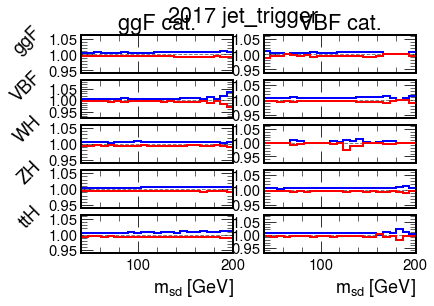

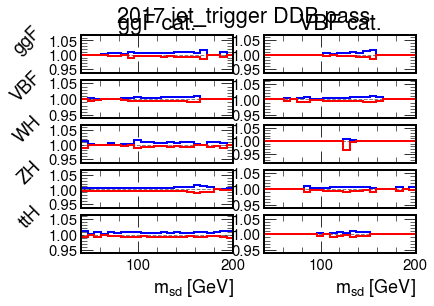

In [34]:
s = 'jet_trigger'
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

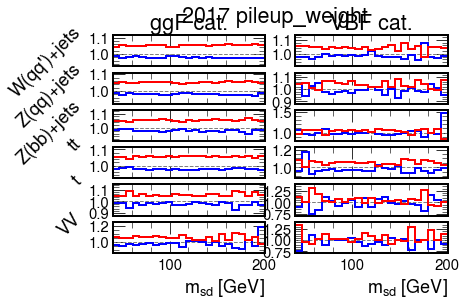

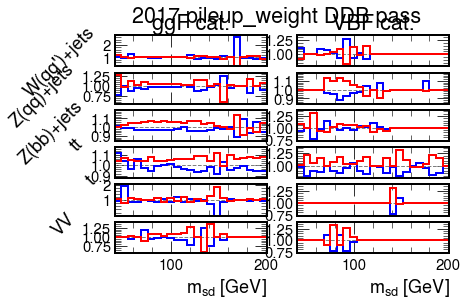

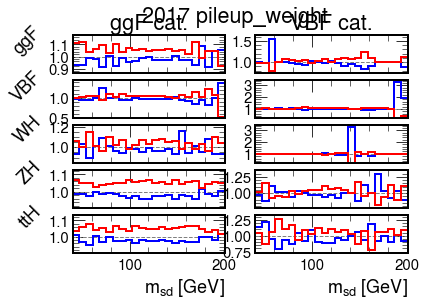

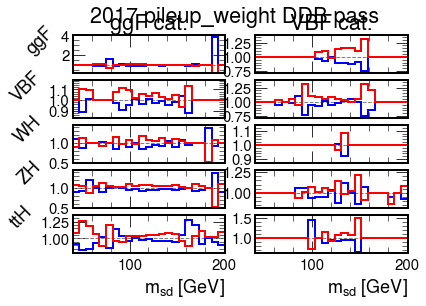

In [35]:
s = 'pileup_weight'
plot_syst_allbkg(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/bkg_'+s)
plot_syst_allbkg(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/bkg_'+s+'_pass')

plot_syst_allsig(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/sig_'+s)
plot_syst_allsig(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/sig_'+s+'_pass')

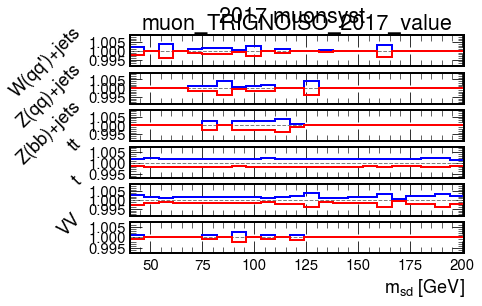

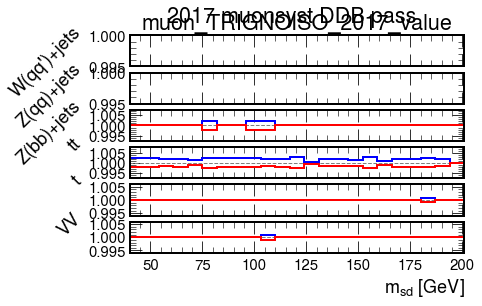

In [36]:
s = 'muon_TRIGNOISO_'+year+'_value'
if year == '2016APV':
    s = 'muon_TRIGNOISO_2016preVFP_value'
elif year == '2016':
    s = 'muon_TRIGNOISO_2016postVFP_value'

plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/mucr_'+s+'_pass')

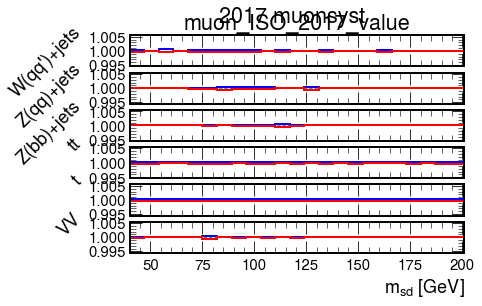

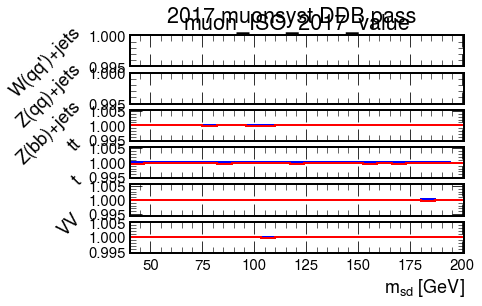

In [37]:
s = 'muon_ISO_'+year+'_value'
if year == '2016APV':
    s = 'muon_ISO_2016preVFP_value'
elif year == '2016':
    s = 'muon_ISO_2016postVFP_value'
    
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/mucr_'+s+'_pass')

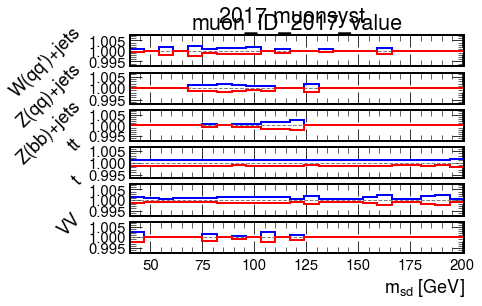

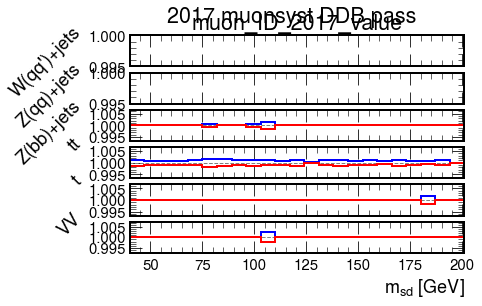

In [38]:
s = 'muon_ID_'+year+'_value'
if year == '2016APV':
    s = 'muon_ID_2016preVFP_value'
elif year == '2016':
    s = 'muon_ID_2016postVFP_value'
    
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/mucr_'+s+'_pass')

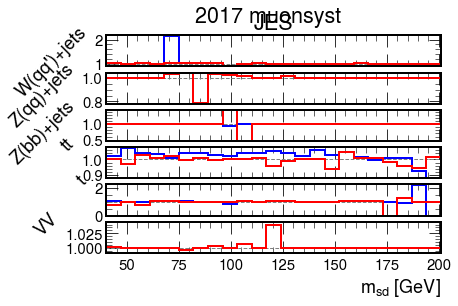

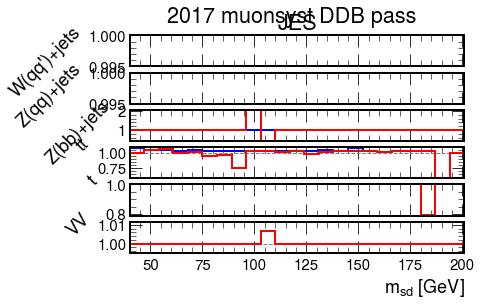

In [39]:
s = 'JES'
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')

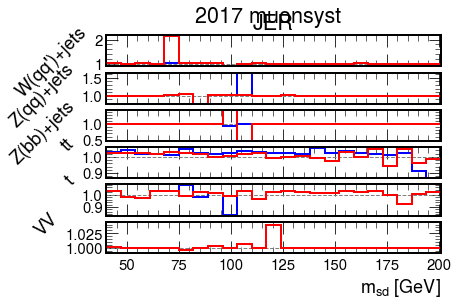

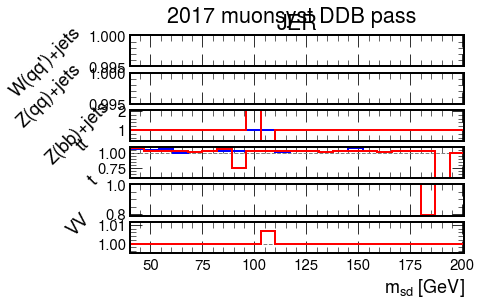

In [40]:
s = 'JER'
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')

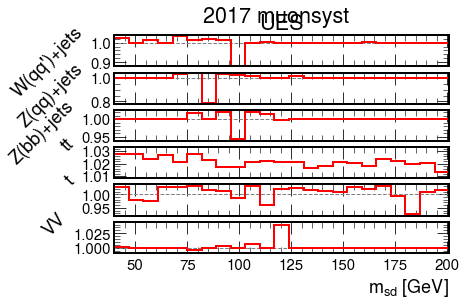

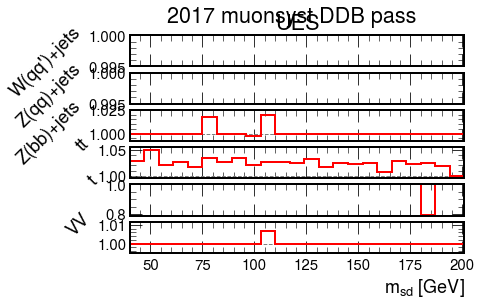

In [41]:
s = 'UES'
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')

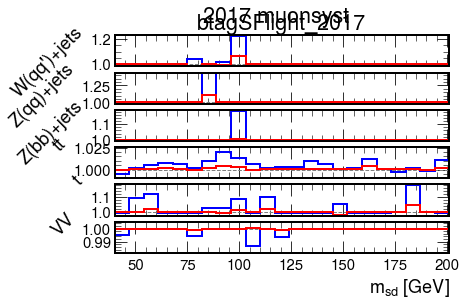

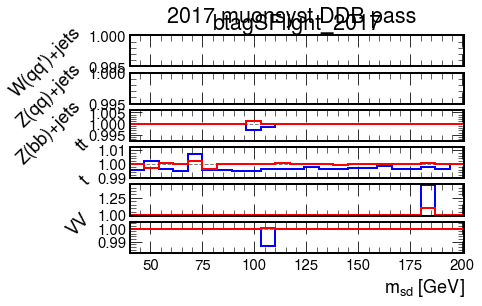

In [42]:
s = 'btagSFlight_'+year
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')

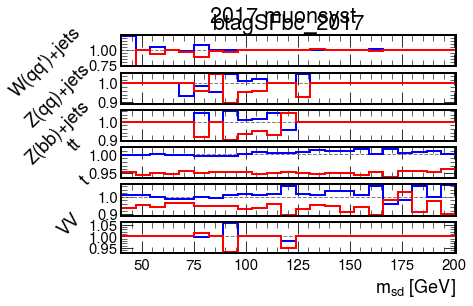

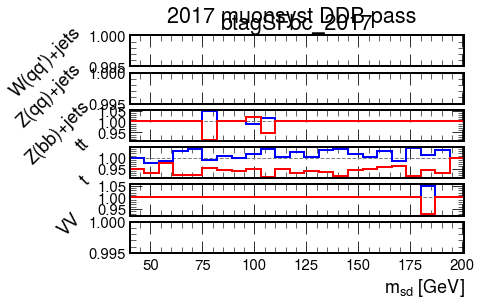

In [43]:
s = 'btagSFbc_'+year
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')

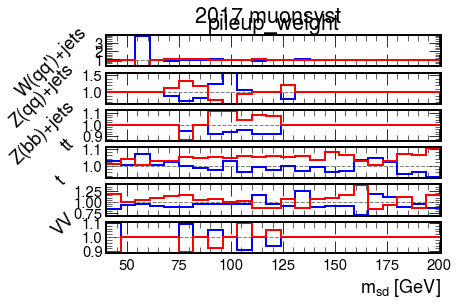

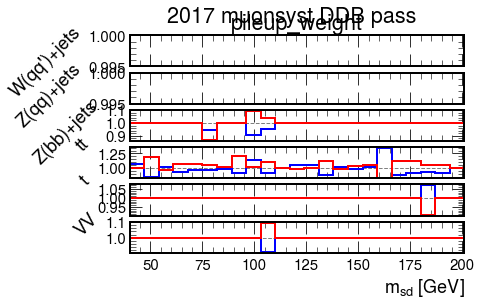

In [44]:
s = 'pileup_weight'
plot_syst_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' muonsyst', year+'/bkg_mucr_'+s)
plot_syst_mucr(mucr_pass, s,'$m_{sd}$ [GeV]', year+' muonsyst DDB pass', year+'/bkg_mucr_'+s+'_pass')